In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

path = '/home/dell/Documentos/rn-cin-covid/'
os.chdir(path)


In [2]:
def evaluate_knn(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    print("Acurácia teste: ", accuracy_score(y_test, y_pred))
    print("   ")
    
    print(classification_report(y_test, y_pred))
    
    df_cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, fmt='.3g')
    plt.show()

In [3]:
def train_predict_KNN(df_total, test):
    # Train
    y = df_total[0]
    X = df_total.drop(0, axis=1)

    y = y.to_numpy()
    X = X.to_numpy()
    
    #Test
    y_test = test[0]
    X_test = test.drop(0, axis=1)

    y_test = y_test.to_numpy()
    X_test = X_test.to_numpy()
    
    # Grid
    k_range = list(range(1,30))
    weight_options = ["uniform", "distance"]

    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    #print (param_grid)
    knn = KNeighborsClassifier()

    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
    grid.fit(X,y)

    #print(grid.grid_scores_)
    '''
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    '''

    print ("Best Score: ", grid.best_score_)
    print ("Best params: ", grid.best_params_)
    print("\n")
    
    evaluate_knn(grid.best_estimator_, X_test, y_test)

### Densenet Retrained

(5308, 1025)
Best Score:  0.9819120207511638
Best params:  {'n_neighbors': 6, 'weights': 'distance'}


Acurácia teste:  0.9207161125319693
   
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       100
           1       0.97      0.92      0.95       291

    accuracy                           0.92       391
   macro avg       0.88      0.92      0.90       391
weighted avg       0.93      0.92      0.92       391



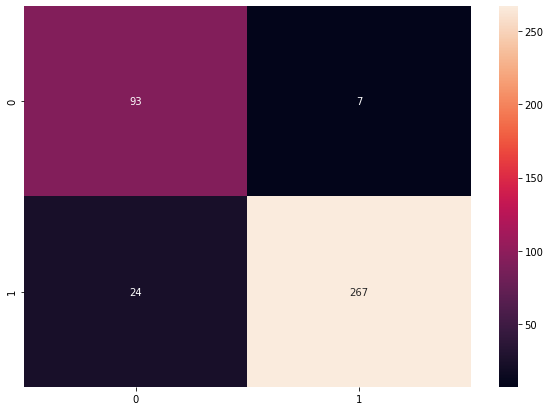

In [4]:
test = pd.read_csv("output/output_densenet_test_retrained.csv", header=None)
train = pd.read_csv("output/output_densenet_train_retrained.csv", header=None)
val = pd.read_csv("output/output_densenet_val_retrained.csv", header=None)

df_total = pd.concat([train,val])
print(df_total.shape)


train_predict_KNN(df_total, test)

### Mobilenet retrained

(5308, 1281)
Best Score:  0.9568592545215507
Best params:  {'n_neighbors': 6, 'weights': 'distance'}


Acurácia teste:  0.8209718670076727
   
              precision    recall  f1-score   support

           0       0.59      0.96      0.73       100
           1       0.98      0.77      0.87       291

    accuracy                           0.82       391
   macro avg       0.79      0.87      0.80       391
weighted avg       0.88      0.82      0.83       391



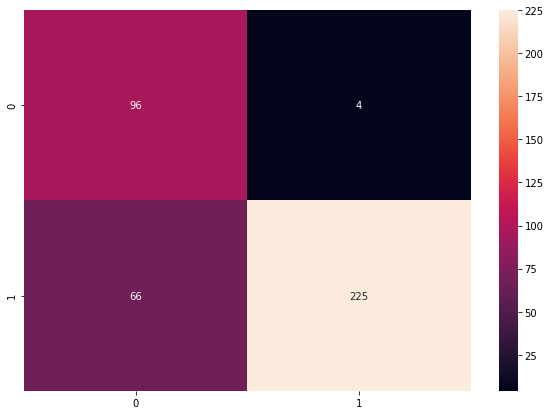

In [5]:
test = pd.read_csv("output/output_mobilenet_test_retrained.csv", header=None)
train = pd.read_csv("output/output_mobilenet_train_retrained.csv", header=None)
val = pd.read_csv("output/output_mobilenet_val_retrained.csv", header=None)

df_total = pd.concat([train,val])
print(df_total.shape)


train_predict_KNN(df_total, test)

### MobileNet Gauss

(10616, 1281)
Best Score:  0.9288801205557065
Best params:  {'n_neighbors': 4, 'weights': 'distance'}


Acurácia teste:  0.8516624040920716
   
              precision    recall  f1-score   support

           0       0.65      0.93      0.76       100
           1       0.97      0.82      0.89       291

    accuracy                           0.85       391
   macro avg       0.81      0.88      0.83       391
weighted avg       0.89      0.85      0.86       391



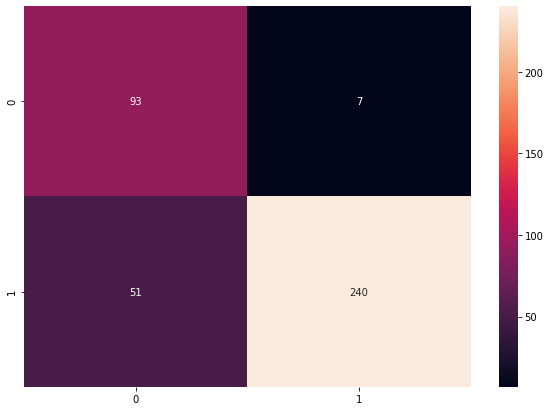

In [6]:
test = pd.read_csv("output/output_mobilenet_gauss_test_retrained.csv", header=None)
train = pd.read_csv("output/output_mobilenet_gauss_train_retrained.csv", header=None)
val = pd.read_csv("output/output_mobilenet_gauss_val_retrained.csv", header=None)

df_total = pd.concat([train,val])
print(df_total.shape)


train_predict_KNN(df_total, test)